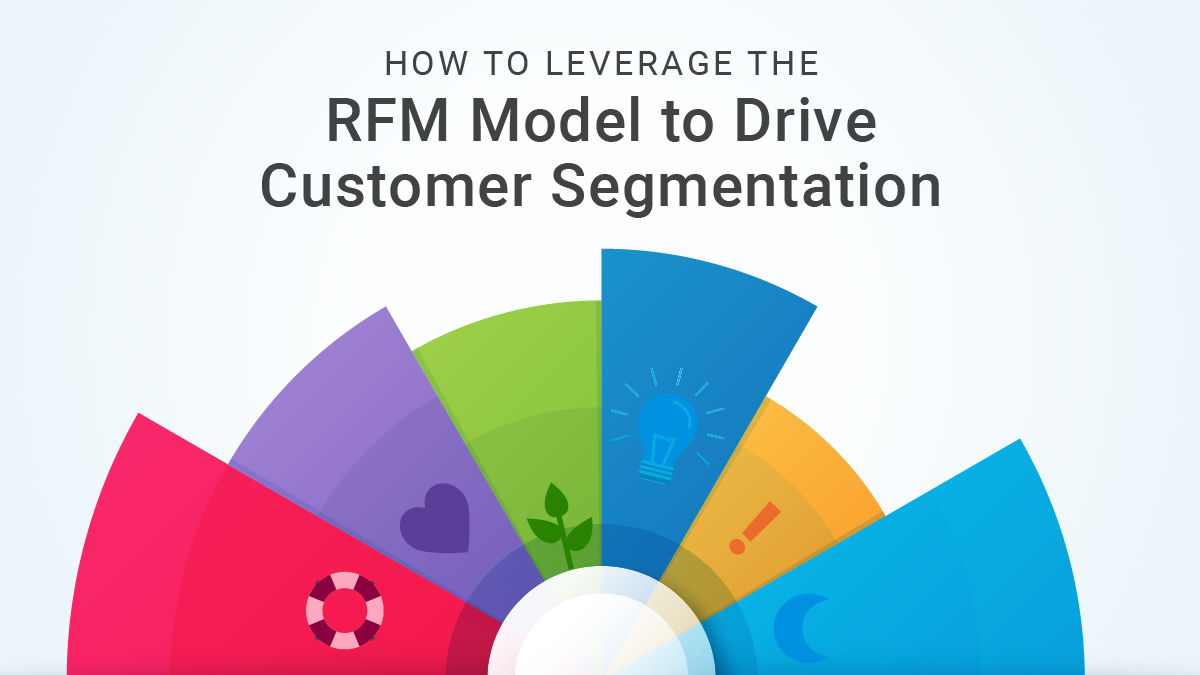

# Customer Segmentation - RFM matrix Principle

RFM means – Recency, Frequency and Monetary. RFM is basically aN old customer segmentation technique that works by using the past behaviour of your customers based on their purchases to split the customers into groups.

## Let’s See How RFM Works:

As RFM is the technique behind customer segmentation, let’s see how it manages to do that. This technique is based on three main categories, they are:

 - Recency(R) – Days since last purchase
 - Frequency(F) – Total number of purchases
 - Monetary Value(M) – How much total money the customer spent.

In [7]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_excel("Online_Retail.xlsx")
df.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


The data contains all the transactions of a UK-based online retailer. All the transactions are between 01 Dec, 2010 and 09 Dec, 2011.

## Data Exploration

Now let’s explore the data by looking at –

 - Missing values in important columns;
 - Customers’ distribution in each country;
 - Unit price and Quantity should > 0;
 - Invoice date should < today.

In [12]:
df1 = df
df1.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [15]:
customer_country = df1[['Country', 'CustomerID']].drop_duplicates()
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


#### The above data states that more than 90 percent of the customers are from United Kingdom only. Some researchers states that customer segmentation varies with geography. So I will limit the data to United Kingdom only.

In [16]:
df1 = df1.loc[df1['Country'] == 'United Kingdom']

#### Check whether there are null values or not in the dataset.

In [17]:
df1.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
lower          493807
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

#### The above output stated that there are 133,600 missing values in the customerID column, and as we are working on customer segmentation, so we do not need to focus on customer ID, so I will simply remove these missing values in this column

In [18]:
df1 = df1[pd.notnull(df1['CustomerID'])]

#### Remove the negative values in Quantity column

In [23]:
df1 = df1[(df1['Quantity'] >= 0)]

#### Add a new column for total price

In [24]:
df1['TotalPrice'] = df1['Quantity'] * df1['UnitPrice']

#### Find out the first and last order dates in the data

In [25]:
df1['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [26]:
df1['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

#### As recency is calculated for a point in time, and the last invoice date is 2011–12–09, so I will use 2011–12–10 to calculate recency

In [27]:
import datetime as dt
NOW = dt.datetime(2011,12,10)
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])

# RFM Customer Segmentation

Now our data is completely ready for customer segmentation, lets move further with this by creating a RFM table

In [30]:
rfmTable = df1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})
rfmTable['InvoiceDate'] = rfmTable['InvoiceDate'].astype(int)
rfmTable.rename(columns={'InvoiceDate':'recency',
                        'InvoiceNo':'frequency',
                        'TotalPrice':'monetary_value'}, inplace=True)

#### To calculate RFM metrics for each customer:

In [31]:
rfmTable.head()

,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


Observations:

  CustomerID 12346 has frequency: 1, monetary value: $77,183.60 and recency: 325 days.
  
 CustomerID 12747 has frequency: 103, monetary value: $4,196.01 and recency: 2 days

# Split the metrics

The easiest way to split metrics into segments is by using quartiles.

- This gives us a starting point for the detailed analysis.
- 4 segments are easy to understand and explain.

In [32]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

# Create a Customer Segment RFM table

In [33]:
segmented_rfm = rfmTable

The lowest recency, highest frequency and best monetary amounts will convey are our best customers

In [34]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

# Add segment numbers

In [36]:
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency', quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency', quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(FMScore, args=('monetary_value', quantiles,))
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


### RFM segments split the customer base into an imaginary 3D cube which is hard to visualize. However, we can sort it out

In [42]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str)+segmented_rfm.f_quartile.map(str)+segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122


# Let`s see the Top 10 of best customers

In [44]:
segmented_rfm[segmented_rfm['RFMScore'] == '111'].sort_values('monetary_value',ascending=False).head(10)

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,337,194550.79,1,1,1,111
17511.0,2,963,91062.38,1,1,1,111
16684.0,4,277,66653.56,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111
13694.0,3,568,65039.62,1,1,1,111
15311.0,0,2379,60767.90,1,1,1,111
13089.0,2,1818,58825.83,1,1,1,111
15769.0,7,130,56252.72,1,1,1,111
